# Importing libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data Set

In [54]:
data = pd.read_csv('/content/drive/MyDrive/Walmart Dataset/Walmart.csv')

In [55]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Analyzing the dataset

In [133]:
data.shape

(5954, 10)

In [57]:
col = data.columns
for i in col:
  print(i,"Has := ",data[i].nunique(), "Values.")

Store Has :=  45 Values.
Date Has :=  143 Values.
Weekly_Sales Has :=  6435 Values.
Holiday_Flag Has :=  2 Values.
Temperature Has :=  3528 Values.
Fuel_Price Has :=  892 Values.
CPI Has :=  2145 Values.
Unemployment Has :=  349 Values.


In [58]:
data['Holiday_Flag'].unique()

array([0, 1])

In [59]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [60]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Extracting Dates from Date columns

In [61]:
data['Date'] = pd.to_datetime(data['Date'])

In [62]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Week'] = pd.DatetimeIndex(data['Date']).week

In [63]:
data.drop(['Date'],axis= 1, inplace = True)

In [64]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


In [65]:
data["Weekly_Sales"].max()

3818686.45

In [66]:
# for i in range(len(data)):
#   for j in data['Year']:
#     if data["Year"][i]==j:
#       if (data["Weekly_Sales"][i]==data["Weekly_Sales"].max()):
#         print(data["Week"][i])


Dropping Duplicates

In [67]:
data.drop_duplicates(inplace= True)
data.shape


(6435, 10)

Checking Weekly sales as per the years

In [68]:
data.pivot_table(values=['Weekly_Sales','Month','Week'], index= ['Year'],aggfunc=['max'],sort = False)

max                  
     Month Week Weekly_Sales
Year                        
2010    12   52   3818686.45
2011    12   52   3676388.98
2012    12   50   2565259.92

In [69]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [70]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,26.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,14.511794
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000


# Ploting Data Set

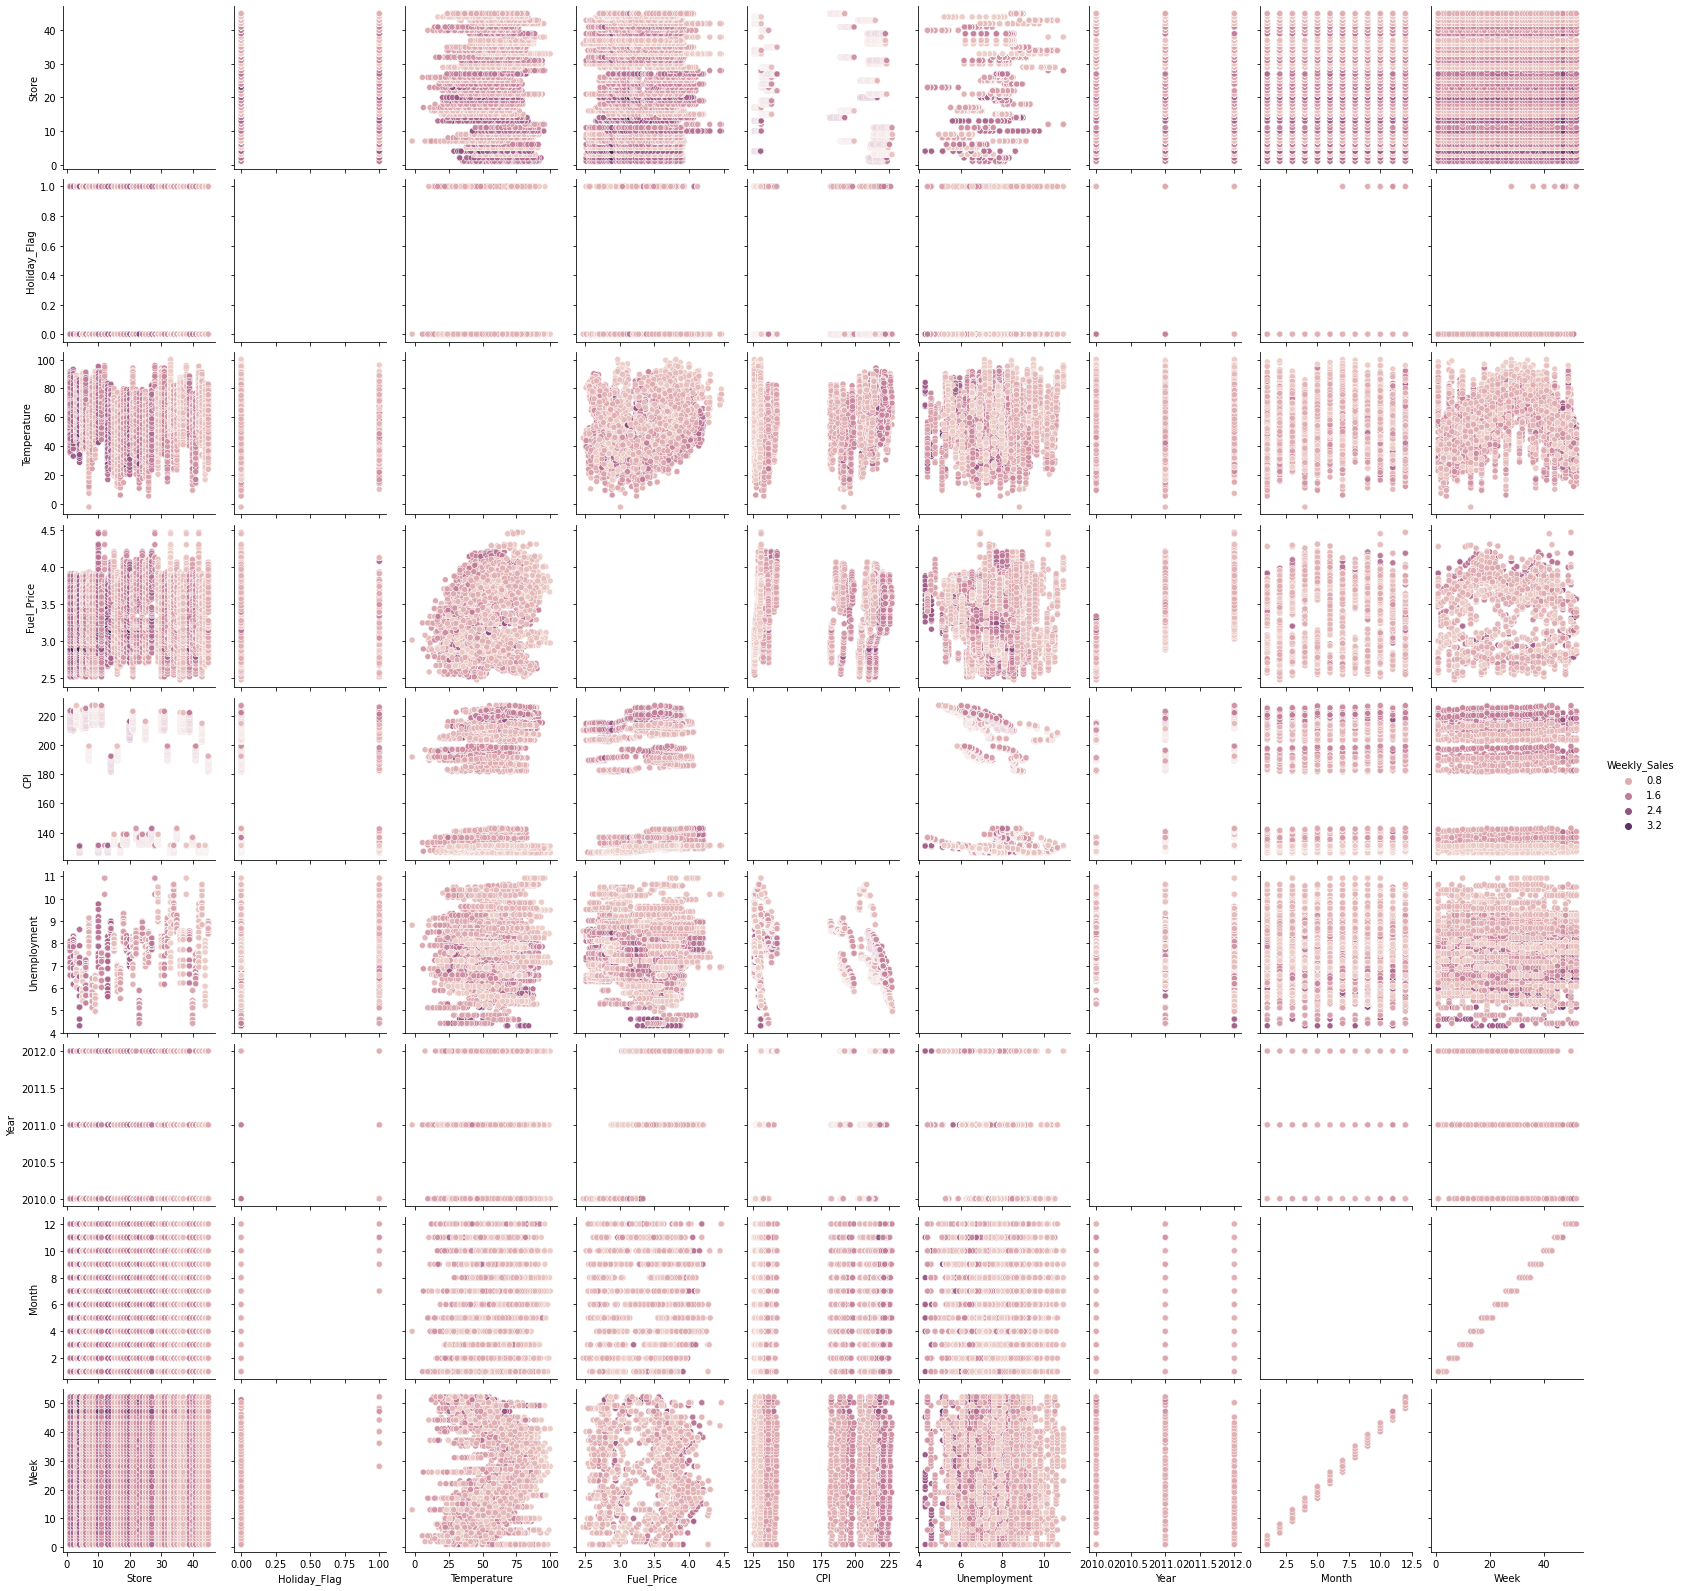

In [134]:
sns.pairplot(hue = 'Weekly_Sales',data= data)

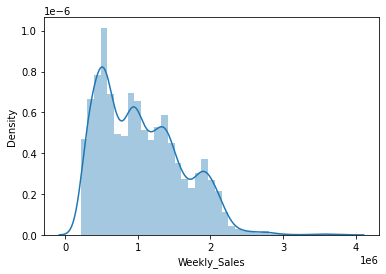

In [72]:
sns.distplot(data['Weekly_Sales'])

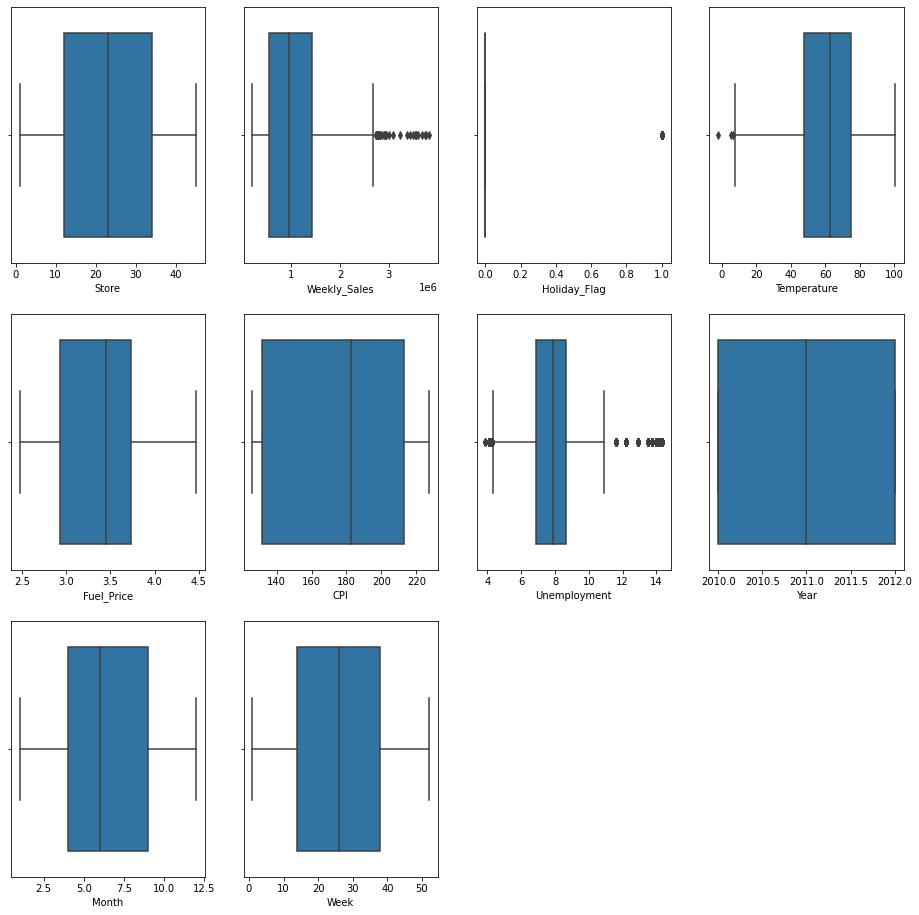

In [73]:
cols = data.columns
plt.figure(figsize=(16,16))
for col in enumerate(cols):
  plt.subplot(3,4,col[0]+1)
  sns.boxplot(x = col[1],hue = 'Weekly_Sales', data= data)


In [74]:
data.shape

(6435, 10)

Removing outliers

In [87]:
Q1 , Q3 = np.percentile(data['Unemployment'],[25,75])
IQR = Q3 - Q1

UP = Q3 + (1.5*IQR)
LOW = Q1 - (1.5*IQR)



data = data[data['Unemployment']<UP]
data = data[data['Unemployment']>LOW]



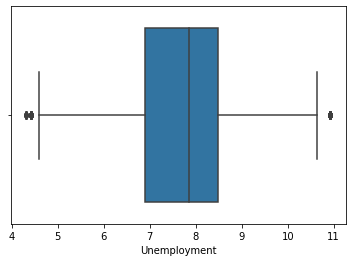

In [88]:
sns.boxplot(x = data['Unemployment'])

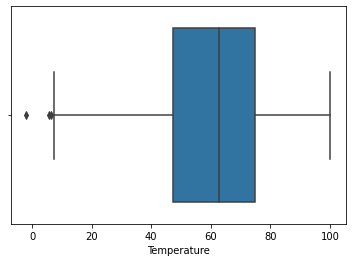

In [77]:
sns.boxplot(x = data['Temperature'])

In [89]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Week'],
      dtype='object')

Checking Linear relation between each columns

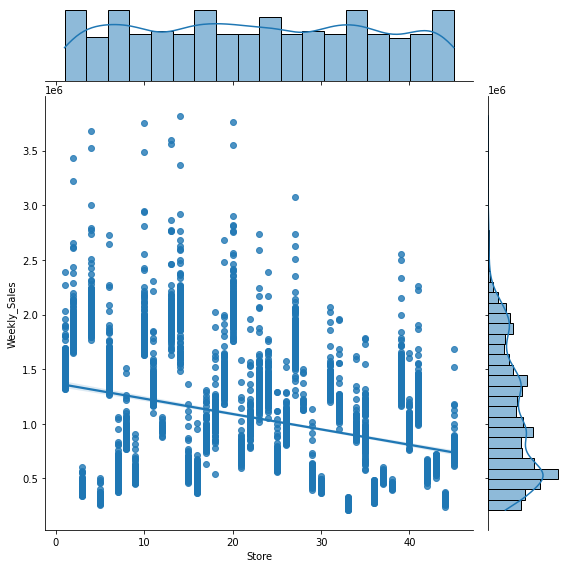

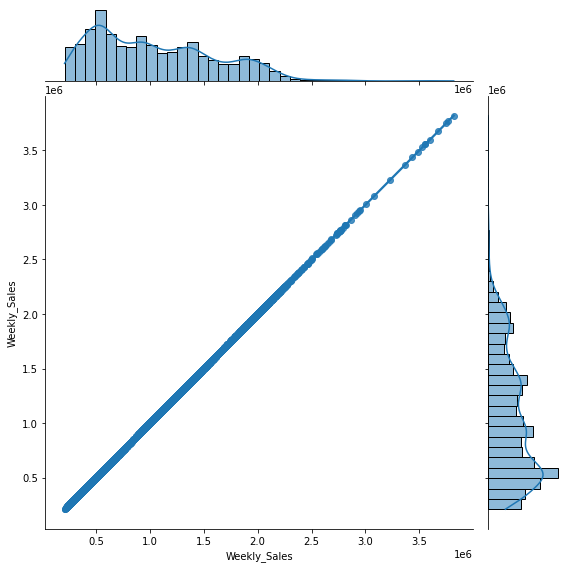

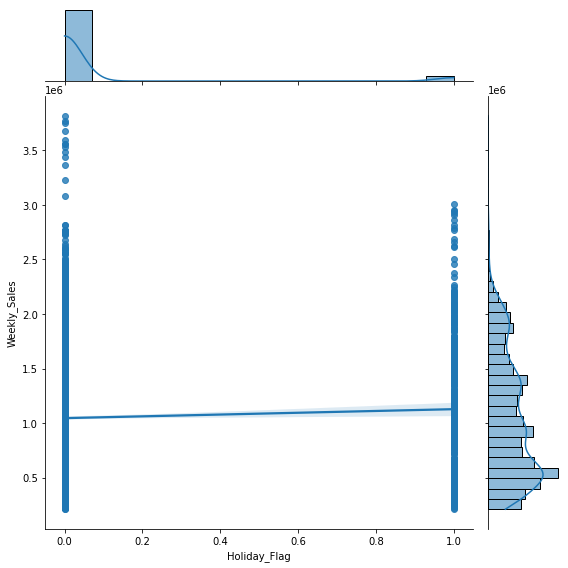

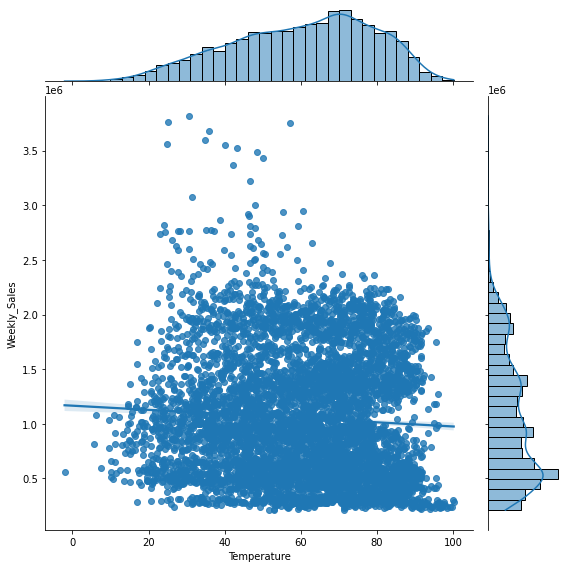

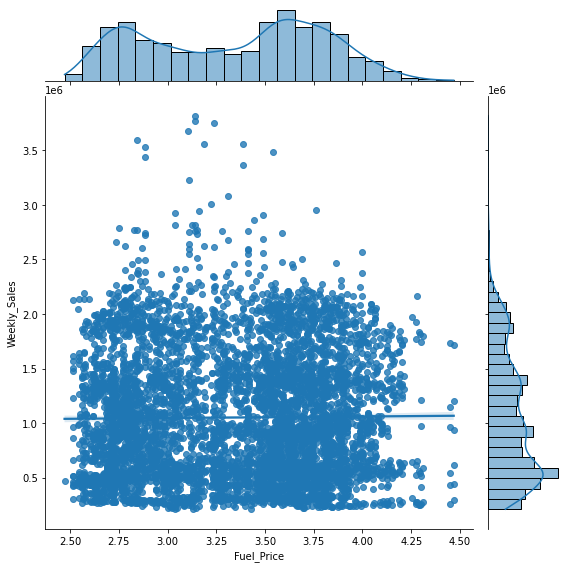

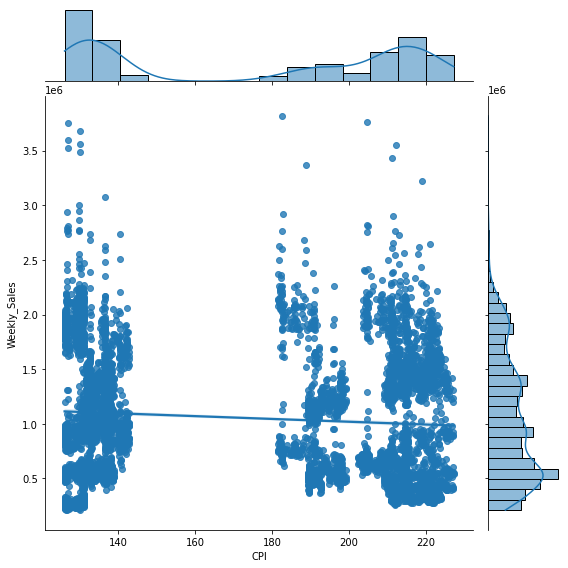

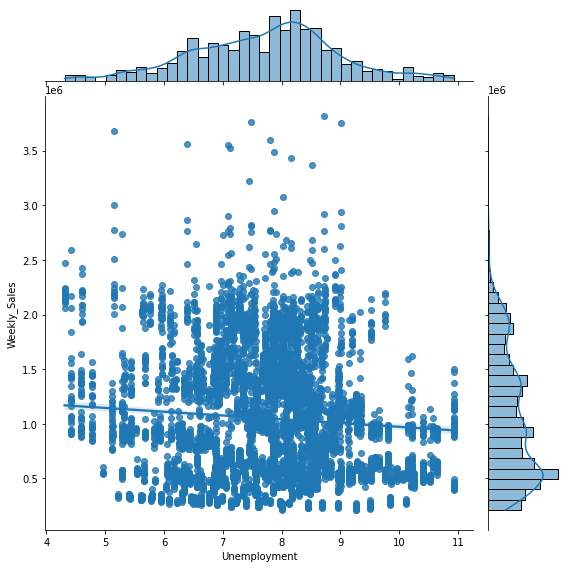

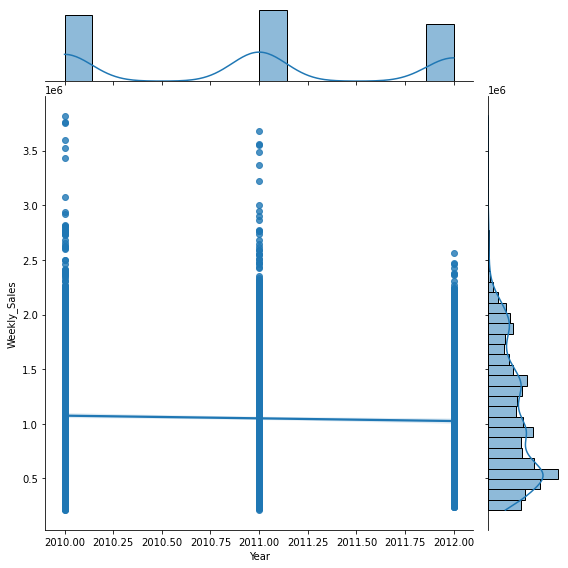

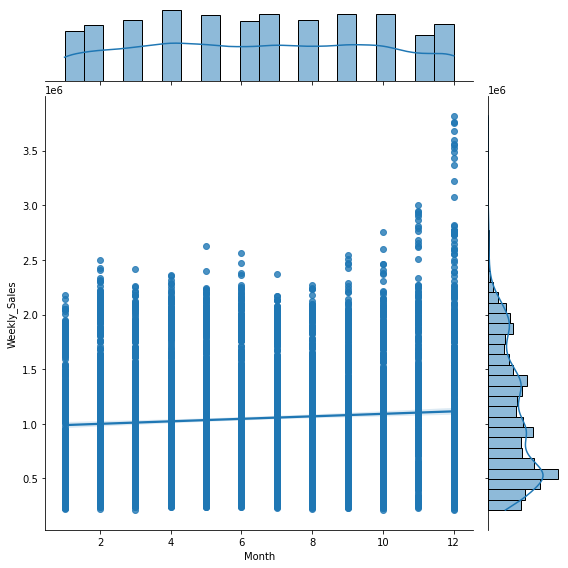

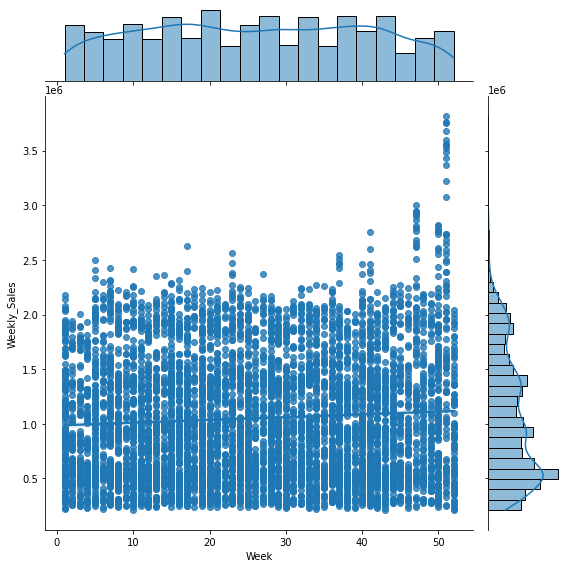

In [94]:
for i in data.columns:
  sns.jointplot(x= i,y='Weekly_Sales',data=data,kind='reg',height= 8)
  plt.show()

Checking Correlation between colummns

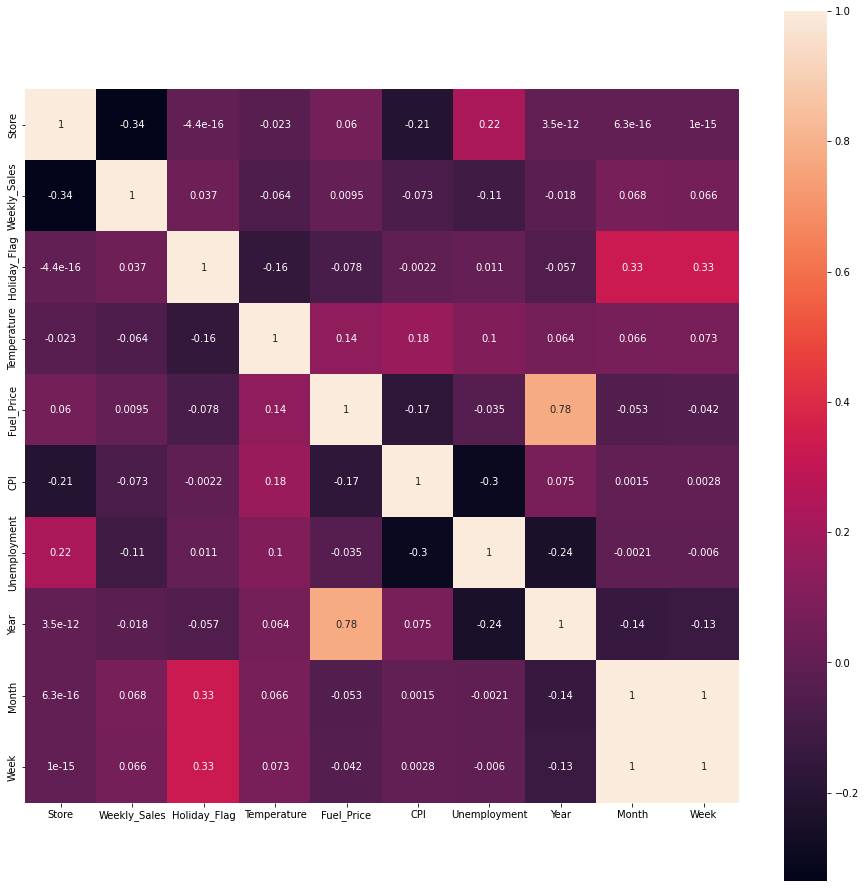

In [78]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(),annot = True,square=True)

# Scaling data

Normalizing data with Standard Scaler

In [122]:
x = data.drop(['Weekly_Sales'],axis = 1)
y = data['Weekly_Sales']

In [121]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
SC.fit_transform(x)

array([[-1.69397911, -0.27420425, -0.99513556, ..., -1.21089907,
        -0.44422923, -0.6202334 ],
       [-1.69397911,  3.64691651, -1.20117022, ..., -1.21089907,
         1.66322793,  1.51612609],
       [-1.69397911, -0.27420425, -1.12417832, ..., -1.21089907,
        -1.34742516, -1.30938162],
       ...,
       [ 1.69397911, -0.27420425, -0.33582468, ...,  1.29864538,
         1.66322793,  1.65395574],
       [ 1.69397911, -0.27420425, -0.22738539, ...,  1.29864538,
         1.06109731,  1.10263716],
       [ 1.69397911, -0.27420425, -0.09834264, ...,  1.29864538,
         1.06109731,  1.17155198]])

# Finding Important Feature

Applying Feature Engeering with decision Tree

In [123]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

est = DecisionTreeRegressor()
rfe = RFE(estimator=est,n_features_to_select=11)
rfe.fit(x,y)
rfe.support_


array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [124]:
nv = pd.DataFrame({'Feature': x.columns,'Ranking':rfe.ranking_})
rfe_view =nv.sort_values(by='Ranking')
rfe_view

,Feature,Ranking
0,Store,1
1,Holiday_Flag,1
2,Temperature,1
3,Fuel_Price,1
4,CPI,1
5,Unemployment,1
6,Year,1
7,Month,1
8,Week,1


# Training Our Model

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)



In [126]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [135]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10)

RF.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

# Testing Our model

In [136]:
pred = LR.predict(x_test)

In [137]:

pred = RF.predict(x_test)

# Result

In [132]:
print("Accuracy of the model::",round(RF.score(x_test, y_test)*100),"%")

Accuracy of the model:: 95 %
